In [1]:
import networkx  as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [15]:
df = pd.read_pickle('/Users/jakobschlierf/Downloads/reptest_cross.pickle')
ratio3 = pd.read_pickle('../../Files/test0609_ratio_temp3.pickle')
ratio2 = pd.read_pickle('../../Files/test0609_ratio_temp2.pickle')

In [76]:
ratio = pd.concat([ratio3, ratio2])

In [77]:
ratio.head()

,subreddit,crosspost_parent,crosspost_child,total,crosspost_parent_%,crosspost_child_%
0,COVID19,16,48,11712,0.001366,0.004098
1,Coronavirus,0,120,24000,0.000000,0.005000
2,CovidVaccinated,77,42,9184,0.008384,0.004573
3,DebateVaccines,184,0,2416,0.076159,0.000000
4,HermanCainAward,24,0,72,0.333333,0.000000


In [3]:
G = nx.MultiDiGraph()

In [4]:
t = df['subreddit'].drop_duplicates().to_list()
t.extend(df['crosspost_parent'].drop_duplicates().to_list())
res = []
for i in t:
    if i not in res:
        res.append(i)
G.add_nodes_from(res)

In [5]:
e = df[['subreddit', 'crosspost_parent', 'count']].values.tolist()

In [6]:
G.add_weighted_edges_from(e)

In [7]:
G

In [8]:
# get number of edges from graph
print(f'Nodes: {len(G.nodes)}, Edges: {len(G.edges)}')

Nodes: 158, Edges: 194


In [9]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    """Return a list of the frequency of each degree value.

    Parameters
    ----------
    G : Networkx graph
       A graph
    in_degree : bool
    out_degree : bool

    Returns
    -------
    hist : list
       A list of frequencies of degrees.
       The degree values are the index in the list.

    Notes
    -----
    Note: the bins are width one, hence len(list) can be large
    (Order(number_of_edges))
    """
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

Text(0, 0.5, 'Frequency')

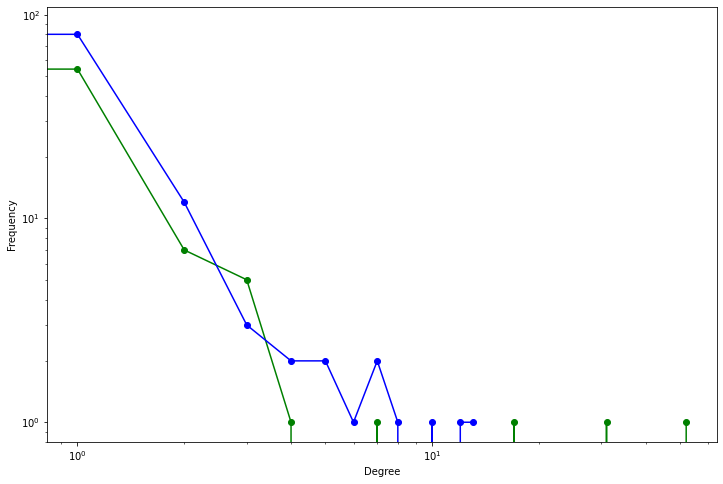

In [10]:
in_degree_freq = degree_histogram_directed(G, in_degree=True)
out_degree_freq = degree_histogram_directed(G, out_degree=True)
degrees = range(len(in_degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
plt.xlabel('Degree')
plt.ylabel('Frequency')

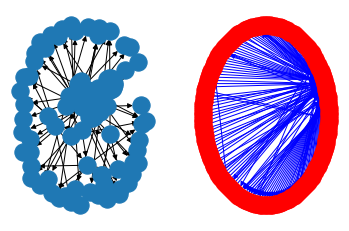

In [11]:
import matplotlib.pyplot as plt

subax1 = plt.subplot(121)
nx.draw(G)   # default spring_layout
subax2 = plt.subplot(122)
nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b')

In [18]:
df2 = pd.DataFrame.from_dict(nx.degree_centrality(G), orient='index', columns=['degree_centrality'])
df2 = df2.reset_index().rename(columns={'index': 'subreddit'})
df2['closeness_centrality'] = df2['subreddit'].map(nx.closeness_centrality(G))
df2['degree'] = df2['subreddit'].map(G.degree)

df2.head()

,subreddit,degree_centrality,closeness_centrality,degree
0,CovidVaccinated,0.006369,0.000000,1
1,DebateVaccines,0.038217,0.006369,6
2,HermanCainAward,0.012739,0.000000,2
3,NoNewNormal,0.050955,0.008493,8
4,Vaccine,0.044586,0.000000,7


In [19]:
df2.sort_values('degree_centrality',ascending=False).head(60)

,subreddit,degree_centrality,closeness_centrality,degree
9,ForUnitedStates,0.350318,0.347008,55
10,GlobalNews,0.216561,0.206662,34
7,CoronavirusSupport,0.171975,0.108035,27
13,UnitedNations,0.101911,0.151416,16
5,COVID19RippleEffects,0.095541,0.075917,15
6,CoronavirusCirclejerk,0.089172,0.014559,14
3,NoNewNormal,0.050955,0.008493,8
15,antivax,0.044586,0.012739,7
4,Vaccine,0.044586,0.000000,7
12,TrueAntiVaccination,0.044586,0.006369,7


In [14]:
df.head()

,subreddit,degree_centrality,closeness_centrality,degree
0,CovidVaccinated,0.006369,0.000000,1
1,DebateVaccines,0.038217,0.006369,6
2,HermanCainAward,0.012739,0.000000,2
3,NoNewNormal,0.050955,0.008493,8
4,Vaccine,0.044586,0.000000,7


In [12]:
nx.closeness_centrality(G)
nx.betweenness_centrality(G)
nx.eigenvector_centrality(G)
nx.degree_centrality(G)

{'COVID19': 0.0647442171066573,
 'CovidVaccinated': 0.0702372491175026,
 'DebateVaccines': 0.06386504157907259,
 'HermanCainAward': 0.0,
 'LockdownSkepticism': 0.07709086626550742,
 'NoNewNormal': 0.08351021976822458,
 'Vaccine': 0.0,
 'Anarcho_Capitalism': 0.07695580868620554,
 'AnythingGoesNews': 0.06806069971813779,
 'COVID': 0.07440104267968517,
 'CaliforniaAction': 0.0002990430622009569,
 'CoV2Canada': 0.0,
 'CoronaKritiker': 0.0,
 'CoronaVirus_2019_nCoV': 0.0,
 'CoronavirusCirclejerk': 0.0740248998956625,
 'CoronavirusOregon': 0.0,
 'CoronavirusUK': 0.05746516954223721,
 'CoronavirusUS': 0.06979087320954262,
 'Coronavirus_BC': 0.050852483906096466,
 'Covid_Reality': 0.0,
 'DebateVaccine': 0.04266353496317612,
 'EndTheLockdowns': 0.06423863059094198,
 'FuckTheAltWrong': 0.064389292873184,
 'LockdownCriticalLeft': 0.06433271177224097,
 'Masks4All': 0.06842114579141141,
 'Mujico': 0.08309946197140773,
 'NEWPOLITIC': 0.07151803255956712,
 'RepublicanValues': 0.0739003627154881,
 'Vac

In [13]:
f = pd.DataFrame(nx.degree(G))

In [14]:
f.columns = ('Subreddit', 'Degree')

In [15]:
f.sort_values('Degree', ascending=False).head(60)

,Subreddit,Degree
73,MakeMeSuffer,350
103,awfuleverything,337
82,PublicFreakout,327
117,oddlysatisfying,294
98,Whatcouldgowrong,287
7,Anarcho_Capitalism,214
5,NoNewNormal,207
69,LeopardsAteMyFace,202
1516,ForUnitedStates,198
1514,interestingasfuck,180


In [54]:
df = pd.read_pickle('../../Files/test0606_temp.pickle')

In [32]:
from psaw import PushshiftAPI

api = PushshiftAPI()

In [35]:
gen = api.search_submissions(subreddit = 'Coronavirus', limit = 1000)

In [36]:
results = list(gen)           
temp = pd.DataFrame([thing.d_ for thing in results])

In [37]:
temp.head()

,all_awardings,allow_live_comments,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,...,whitelist_status,wls,created,author_cakeday,removed_by_category,link_flair_css_class,media,media_embed,secure_media,secure_media_embed
0,[],False,Viewfromthe31stfloor,#0266b3,None,[],24769a0e-5574-11ec-b310-9e1ed90b5602,Boosted! ✨💉✅,light,text,...,all_ads,6,1.654514e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,VacationItchy,NaN,None,[],NaN,None,NaN,text,...,all_ads,6,1.654510e+09,True,moderator,NaN,NaN,NaN,NaN,NaN
2,[],False,roujayn,NaN,None,[],NaN,None,NaN,text,...,all_ads,6,1.654504e+09,NaN,moderator,NaN,NaN,NaN,NaN,NaN
3,[],False,jackspratdodat,NaN,None,[],NaN,None,NaN,text,...,all_ads,6,1.654504e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,SanatanCharacters,NaN,None,[],NaN,None,NaN,text,...,all_ads,6,1.654503e+09,NaN,moderator,NaN,NaN,NaN,NaN,NaN


In [38]:
temp[['url', 'selftext']]

,url,selftext
0,https://www.nytimes.com/2022/06/03/health/covi...,
1,http://news-analysis4.blogspot.com/2022/06/Wha...,
2,https://www.ourhealthinworldwide.com/2022/05/t...,
3,https://www.nbcnews.com/news/us-news/covid-vac...,
4,https://sanatancharacters.blogspot.com/2022/06...,
...,...,...
991,https://www.cnbc.com/2022/05/10/experts-how-to...,
992,https://www.timesofisrael.com/israeli-study-sh...,
993,https://www.cnn.com/2022/05/10/health/covid-19...,
994,https://www.nytimes.com/2022/05/10/health/cdc-...,


In [39]:
gen2 = api.search_submissions(id = 'v5yci0')

In [40]:
results = list(gen2)           
temp2 = pd.DataFrame([thing.d_ for thing in results])

KeyboardInterrupt: 